In [43]:
import numpy as np
import pickle
import json
from src.extract_features.deep_learning_embeddings import embedding_vector_with_detect
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from unidecode import unidecode


VGG-FACE

1/1 [==============================] - 0s 30ms/step
['CE049' 'CE048']
[{'x': 548, 'y': 293, 'w': 212, 'h': 288}, {'x': 866, 'y': 368, 'w': 224, 'h': 294}]


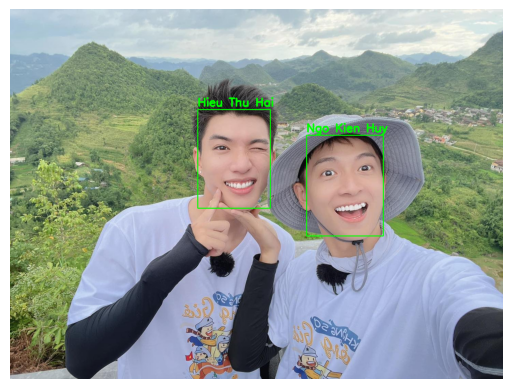

In [27]:
model_path = "../../data/models/knn_5_cosine_distance_vggface.pkl"

# Load model
with open(model_path, 'rb') as f:
    knn_vgg_face_model = pickle.load(f)

# Load image
image_path = "../data/images_test_predict/022.jpg"
image = cv2.imread(image_path) # Sử dụng cv2 để đọc ảnh


embeddings, facial_area = embedding_vector_with_detect(image_path,
                                          model="VGG-Face",
                                          normalization="base",
                                          detector_backend="mtcnn")

embeddings = np.array(embeddings)

# Dự đoán
predictions = knn_vgg_face_model.predict(embeddings)
print(predictions)
print(facial_area)

# load data từ json
with open('../../data/json/vietnam_celeb.json', 'r', encoding='utf-8') as f:
    celeb = json.load(f)

# Create a dictionary to map celeb id to name
id2name = {c['id']: c['name'] for c in celeb}

# Loop through the predictions
for i, prediction in enumerate(predictions):

    # Get the facial area coordinates
    coords = facial_area[i]
    x, y, w, h = coords['x'], coords['y'], coords['w'], coords['h']

    # Draw a rectangle around the face
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Add text label with the predicted celeb name
    name = id2name[prediction]

    cv2.putText(image, unidecode(name), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 255, 0), 4)

# Convert BGR image to RGB for display
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with the bounding boxes and labels
plt.imshow(image)
plt.axis('off')
plt.show()


In [17]:
# Tạo danh sách rỗng để lưu trữ thông tin của những người nổi tiếng được dự đoán
predicted_celebs = []

# Tạo một set để lưu trữ các id của những người nổi tiếng đã được dự đoán
predicted_celeb_ids = set()

# Duyệt qua các dự đoán trong predictions
for prediction in predictions:

    # Nếu id của người nổi tiếng chưa có trong predicted_celeb_ids
    if prediction not in predicted_celeb_ids:

        # Tìm kiếm đối tượng trong celeb có id tương ứng với dự đoán hiện tại
        for celeb_info in celeb:
            if celeb_info['id'] == prediction:
                # Nếu tìm thấy đối tượng, thêm thông tin của đối tượng đó vào danh sách thông tin của những người nổi tiếng
                predicted_celebs.append(celeb_info)

                # Thêm id của người nổi tiếng này vào predicted_celeb_ids
                predicted_celeb_ids.add(prediction)



In [18]:
import json
vggface_results_json = json.dumps(predicted_celebs, indent=4, ensure_ascii=False)
print(vggface_results_json)

[
    {
        "id": "CE049",
        "name": "Hiếu Thứ Hai",
        "description": "Ca sĩ",
        "wiki_url": "https://vi.wikipedia.org/wiki/Hieuthuhai",
        "article": "Trần Minh Hiếu, thường được biết đến với nghệ danh HIEUTHUHAI hoặc hieuthuhai, là một nam rapper, nhạc sĩ kiêm diễn viên người Việt Nam. Anh hiện đang là thành viên của nhóm nhạc GERDNANG.\nAnh bắt đầu trở nên nổi tiếng sau khi tham gia chương trình Thế giới Rap – King of Rap mùa đầu tiên. Ngoài ra, anh cũng là thành viên chính trong chương trình truyền hình thực tế 2 ngày 1 đêm. Anh đã được đề cử Ca sĩ đột phá Giải thưởng Làn Sóng Xanh 2022 và Ca sĩ mới của năm Giải thưởng Cống hiến."
    },
    {
        "id": "CE048",
        "name": "Ngô Kiến Huy",
        "description": "Ca sĩ",
        "wiki_url": "https://vi.wikipedia.org/wiki/Ng%C3%B4_Ki%E1%BA%BFn_Huy",
        "article": "Lê Thành Dương, hay còn được biết đến với nghệ danh Ngô Kiến Huy, là một nam ca sĩ, diễn viên và người dẫn chương trình người Việt 

In [19]:
# Trả về danh sách thông tin của những người nổi tiếng được dự đoán
for celeb_info in predicted_celebs:
    print(celeb_info['name'])

Hiếu Thứ Hai
Ngô Kiến Huy


1/1 [==============================] - 0s 38ms/step
['CE026' 'CE009' 'CE004' 'CE017']
[{'x': 299, 'y': 319, 'w': 149, 'h': 177}, {'x': 713, 'y': 332, 'w': 139, 'h': 192}, {'x': 486, 'y': 357, 'w': 157, 'h': 229}, {'x': 114, 'y': 341, 'w': 103, 'h': 194}]


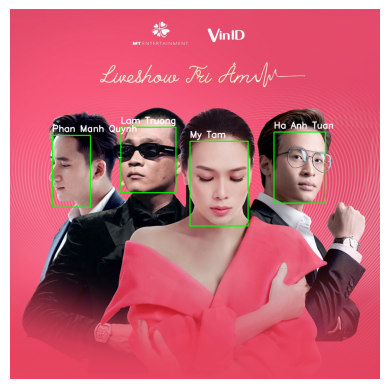

In [42]:
model_path = "../../data/models/knn_5_cosine_distance_vggface.pkl"

# Load model
with open(model_path, 'rb') as f:
    knn_vgg_face_model = pickle.load(f)

# Load image
image_path = "../data/images_test_predict/014.jpg"
image = cv2.imread(image_path) # Sử dụng cv2 để đọc ảnh


embeddings, facial_area = embedding_vector_with_detect(image_path,
                                          model="VGG-Face",
                                          normalization="base",
                                          detector_backend="mtcnn")

embeddings = np.array(embeddings)

# Dự đoán
predictions = knn_vgg_face_model.predict(embeddings)
print(predictions)
print(facial_area)

# load data từ json
with open('../../data/json/vietnam_celeb.json', 'r', encoding='utf-8') as f:
    celeb = json.load(f)

# Create a dictionary to map celeb id to name
id2name = {c['id']: c['name'] for c in celeb}

# Loop through the predictions
for i, prediction in enumerate(predictions):

    # Get the facial area coordinates
    coords = facial_area[i]
    x, y, w, h = coords['x'], coords['y'], coords['w'], coords['h']

    # Draw a rectangle around the face
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Add text label with the predicted celeb name
    name = id2name[prediction]

    cv2.putText(image, unidecode(name), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

# Convert BGR image to RGB for display
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with the bounding boxes and labels
plt.imshow(image)
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 44ms/step
['CE004']
[{'x': 228, 'y': 49, 'w': 169, 'h': 206}]


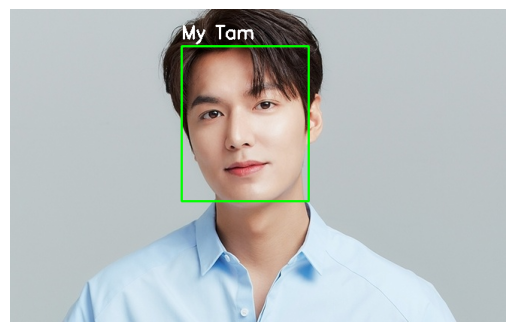

In [44]:
model_path = "../../data/models/knn_5_cosine_distance_vggface.pkl"

# Load model
with open(model_path, 'rb') as f:
    knn_vgg_face_model = pickle.load(f)

# Load image
image_path = "../data/images_test_predict/030.jpg"
image = cv2.imread(image_path) # Sử dụng cv2 để đọc ảnh


embeddings, facial_area = embedding_vector_with_detect(image_path,
                                          model="VGG-Face",
                                          normalization="base",
                                          detector_backend="mtcnn")

embeddings = np.array(embeddings)

# Dự đoán
predictions = knn_vgg_face_model.predict(embeddings)
print(predictions)
print(facial_area)

# load data từ json
with open('../../data/json/vietnam_celeb.json', 'r', encoding='utf-8') as f:
    celeb = json.load(f)

# Create a dictionary to map celeb id to name
id2name = {c['id']: c['name'] for c in celeb}

# Loop through the predictions
for i, prediction in enumerate(predictions):

    # Get the facial area coordinates
    coords = facial_area[i]
    x, y, w, h = coords['x'], coords['y'], coords['w'], coords['h']

    # Draw a rectangle around the face
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Add text label with the predicted celeb name
    name = id2name[prediction]

    cv2.putText(image, unidecode(name), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

# Convert BGR image to RGB for display
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with the bounding boxes and labels
plt.imshow(image)
plt.axis('off')
plt.show()
